In [1]:
##############################################################################################
#                                   Import Libraries
##############################################################################################
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import binary_crossentropy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from keras.optimizers import adam, rmsprop
from keras import initializers
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpl
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using TensorFlow backend.


In [2]:
##############################################################################################
#                                   Load Dataset
##############################################################################################
Cancer = pd.read_csv(r"C:\Users\Ramatu's PC\Desktop\430pm\Cancerdata.csv")


# Dataset Cleaning


In [3]:
# drop the ID column
Cancer.drop(['id'], axis=1, inplace = True)

#strip() takes out leading and trailing spaces
Cancer.columns.str.strip()

#View the first five rows
Cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Explore Dataset


In [4]:
print('Shape of dataset')
Cancer.shape

Shape of dataset


(569, 31)

In [5]:
print('Check dataset for Null Values')
Cancer.isnull().sum() / Cancer.shape[0] 


Check dataset for Null Values


diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64

In [6]:
print('Get Dataset information')
Cancer.info()
  

Get Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  ar

In [7]:
print('Get the values count of the binary column')
Cancer["diagnosis"].value_counts()

Get the values count of the binary column


B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
print('Statistical description of the columns in the dataframe')
Cancer.describe()

Statistical description of the columns in the dataframe


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Exploratory Analysis

Plot of Histogram showing the distribution of each feature


C:\Users\Ramatu's PC\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\Ramatu's PC\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


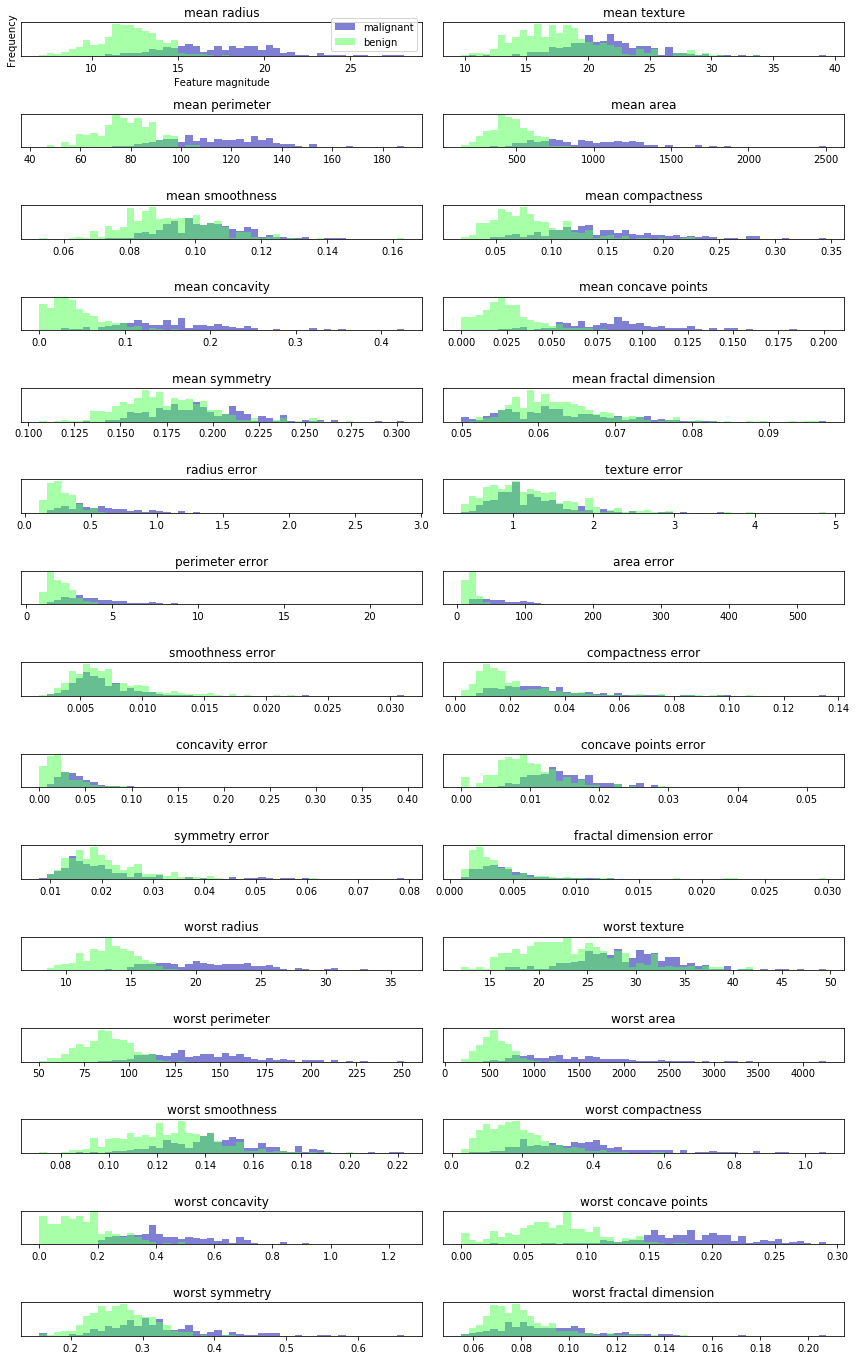

In [9]:
print('Plot of Histogram showing the distribution of each feature')
import mglearn
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(12, 19))
malignant = cancer.data[cancer.target == 0] 
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(()) 
    ax[0].set_xlabel("Feature magnitude")
    ax[0].set_ylabel("Frequency")
    ax[0].legend(["malignant", "benign"],
                 loc="best")
    fig.tight_layout()

Visual representation of the correlation matrix ------Heatmap------


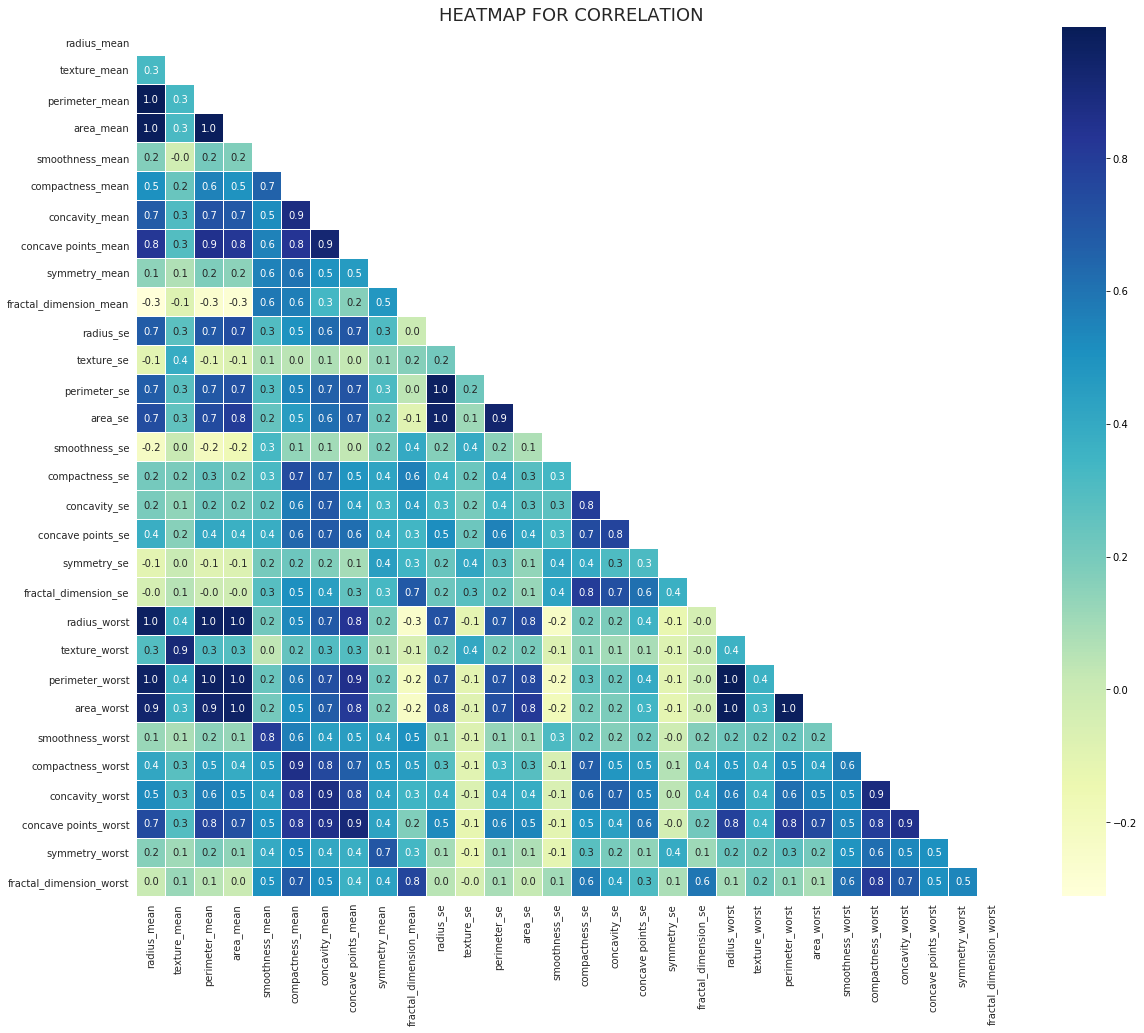

In [10]:
#Build the correlation table
corr = Cancer.corr()
print('Visual representation of the correlation matrix ------Heatmap------')
corr = corr [corr < 1] ## To avoid getting correlation of variable with themselves i.e value of 1 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f,ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="YlGnBu", linewidths=.5, mask = mask, ax=ax)
plt.title('HEATMAP FOR CORRELATION', size=18);


# Model Implementation

In [11]:
##############################################################################################
#                       Split the dataset into input (X) and output (Y)
##############################################################################################
X = Cancer.drop('diagnosis',axis=1)
Y = Cancer['diagnosis']

In [12]:
##############################################################################################
#                         Encode Class value as integer
##############################################################################################
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
print('--------------- Split-out dataset [Done]')

--------------- Split-out dataset [Done]


In [14]:
# baseline model

def create_baseline():
        # Create a Sequential model and add layers one at a time until the desired network topology is 
    #achieved
    model = Sequential()

    # Create the first layer. check that the input layer has the right number of dimension by using
    # input_dim argument and setting it to 30 for the 30 input variables
    model.add(Dense(34, input_dim = 30, kernel_initializer ='uniform', activation = 'relu'))
    # The first hidden layer has 34 neurons and expects 30 input variables
    # The initialization method is uniform --- The network weights is initialized to a small random
    #number generated from the uniform distribution --- Keras default (0 and 0.05)
    # The activation function for the first layer is relu

    # Create second Layer
    model.add(Dense(30, kernel_initializer ='uniform', activation = 'relu'))

    # Create third Layer
    model.add(Dense(1, kernel_initializer ='uniform', activation = 'sigmoid'))
    # Sigmoid activation function --- to ensure that the network output is between 0 and 1
    #the final layer predicts class --- Malignant, or Benign
    

    # Compile model
    model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

# evaluate model with standardized dataset
estimator_B = KerasClassifier(build_fn=create_baseline, nb_epoch=150, batch_size=10, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results_TS = cross_val_score(estimator_B, X_train, y_train, cv=kfold)
results_VS = cross_val_score(estimator_B, X_test, y_test, cv=kfold)
print("Baseline Train set: %.2f%% (%.2f%%)" % (results_TS.mean()*100, results_TS.std()*100))
print("Baseline Test set: %.2f%% (%.2f%%)" % (results_VS.mean()*100, results_VS.std()*100))

Baseline Train set: 77.37% (13.97%)
Baseline Test set: 60.23% (17.01%)


In [15]:
# evaluate baseline model with standardized dataset
numpy.random.seed(seed)
estimators = []
estimators.append(( 'standardize' , StandardScaler()))
estimators.append(( 'mlp' , KerasClassifier(build_fn=create_baseline, nb_epoch=150,
batch_size=10, verbose=0)))
pipeline_ST = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results_TS2 = cross_val_score(pipeline_ST, X_train, y_train, cv=kfold)
results_VS2 = cross_val_score(pipeline_ST, X_test, y_test, cv=kfold)
print("Standardized Train set: %.2f%% (%.2f%%)" % (results_TS2.mean()*100, results_TS2.std()*100))
print("Standardized Test set: %.2f%% (%.2f%%)" % (results_VS2.mean()*100, results_TS2.std()*100))

Standardized Train set: 93.70% (4.58%)
Standardized Test set: 88.30% (4.58%)


In [16]:
#---------Classification report--------
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print ("----------------------> [KerasClassifier performance summary]")
pipeline_ST.fit(X_train, y_train)

y_pred_ST = pipeline_ST.predict(X_test)
scores_ST = cross_val_score(pipeline_ST, X_test, y_test, scoring='roc_auc', cv=kfold, n_jobs=-1)

print("Accuracy: {:.3f}".format(accuracy_score(y_pred_ST, y_test)))
# Confusion Matrix
print("\nKerasClassifier Confusion Matrix:\n")
print(confusion_matrix(y_test,y_pred_ST))
print("\\nKerasClassifier Classification Report:\n")
print(classification_report(y_test,y_pred_ST))
print('Mean ROC AUC: %.3f' % scores_ST.mean(), end="\n\n")

# reduce from 2d array to 1d array
y_test = y_test.ravel() 
y_pred_ST= y_pred_ST.ravel() 

print('Misclassified examples: %d' % (y_test != y_pred_ST).sum())
print('Misclassification rate: %.3f' % ((y_test != y_pred_ST).sum()/y_pred_ST.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(pipeline_ST.score(X_test, y_test)))
print("Training set Accuracy: {:.3f}".format(pipeline_ST.score(X_train, y_train)))
print('--------------- KerasClassifier: classifier.fit [Done]')

----------------------> [KerasClassifier performance summary]
Accuracy: 0.924

KerasClassifier Confusion Matrix:

[[101   7]
 [  6  57]]
\nKerasClassifier Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.89      0.90      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171

Mean ROC AUC: 0.978

Misclassified examples: 13
Misclassification rate: 0.203 %
Test set Accuracy: 0.924
Training set Accuracy: 0.942
--------------- KerasClassifier: classifier.fit [Done]


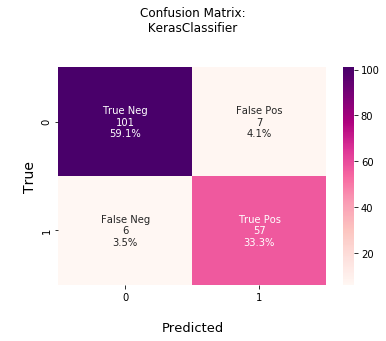

In [17]:
cm =confusion_matrix(y_test, y_pred_ST)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\n KerasClassifier \n\n")
plt.show()

In [18]:
##############################################################################################
#                       Define The Neural Network Model
##############################################################################################


def create_model(optimizer= 'rmsprop' , kernel_initializer= 'glorot_uniform' ):
    
    # Create a Sequential model and add layers one at a time until the desired network topology is 
    #achieved
    model = Sequential()

    # Create the first layer. check that the input layer has the right number of dimension by using
    # input_dim argument and setting it to 30 for the 30 input variables
    model.add(Dense(34, input_dim = 30, kernel_initializer ='uniform', activation = 'relu'))
    # The first hidden layer has 34 neurons and expects 30 input variables
    # The initialization method is uniform --- The network weights is initialized to a small random
    #number generated from the uniform distribution --- Keras default (0 and 0.05)
    # The activation function for the first layer is relu

    # Create second Layer
    model.add(Dense(30, kernel_initializer ='uniform', activation = 'relu'))

    # Create third Layer
    model.add(Dense(1, kernel_initializer ='uniform', activation = 'sigmoid'))
    # Sigmoid activation function --- to ensure that the network output is between 0 and 1
    #the final layer predicts class --- Malignant, or Benign

    # Compile model
    model.compile(loss= 'binary_crossentropy' , optimizer= optimizer , metrics=[ "accuracy" ])
    return model

In [19]:
##############################################################################################
#                                Build Pipeline + RandomizedSearch (Parameter Tunning)
##############################################################################################
estimators = []
estimators.append(( 'standardize' , StandardScaler()))
estimators.append(( 'mlp' , KerasClassifier(build_fn=create_model, verbose=0)))
pipeline = Pipeline(estimators)

# define the grid search parameters
param_dist = {
    'mlp__epochs': [50, 100, 150],
    'mlp__kernel_initializer': [ 'glorot_uniform', 'uniform', 'normal'], 
    'mlp__batch_size':[5, 10, 20],
    'mlp__optimizer':["rmsprop" , "adam" ]
}
from time import time
t0 = time()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
search = RandomizedSearchCV(pipeline, param_distributions = param_dist, cv=cv)
#fit the search
clf = search.fit(X_train, y_train)
print("done in %0.3fs" % (time() - t0))
#Get Best Parameters
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

done in 467.238s
Best parameter (CV score=0.977):
{'mlp__optimizer': 'adam', 'mlp__kernel_initializer': 'glorot_uniform', 'mlp__epochs': 50, 'mlp__batch_size': 20}


In [20]:
#----------Test Best Parameters---------
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time
t0 = time()
clf =clf.best_estimator_
y_pred = clf.predict(X_test)
print("done in %0.3fs" % (time() - t0))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
scores_cv = cross_val_score(clf, X_train, y_train, cv=cv)

scores = cross_val_score(clf, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)


done in 0.136s


In [21]:
#---------Classification report--------
print ("----------------------> [KerasClassifier performance summary]")
print("Accuracy: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("mean: {:.3f} (std: {:.3f})".format(scores_cv.mean(),
                                          scores_cv.std()),
                                          end="\n\n" )
# Confusion Matrix
print("\nKerasClassifier Confusion Matrix:\n")
print(confusion_matrix(y_test,y_pred))
print("\\nKerasClassifier Classification Report:\n")
print(classification_report(y_test,y_pred))
print('Mean ROC AUC: %.3f' % scores.mean(), end="\n\n")

# reduce from 2d array to 1d array
y_test = y_test.flatten() 
y_pred= y_pred.flatten() 

print('Misclassified examples: %d' % (y_test != y_pred).sum())
print('Misclassification/Error rate: %.3f' % ((y_test != y_pred).sum()/y_pred.sum()) + ' %')
print("Test set Accuracy: {:.3f}".format(clf.score(X_test, y_test)))
print("Training set Accuracy: {:.3f}".format(clf.score(X_train, y_train)))
print('--------------- KerasClassifier --Parameters specified-- : classifier.fit [Done]')

----------------------> [KerasClassifier performance summary]
Accuracy: 0.959
mean: 0.977 (std: 0.018)


KerasClassifier Confusion Matrix:

[[105   3]
 [  4  59]]
\nKerasClassifier Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Mean ROC AUC: 0.994

Misclassified examples: 7
Misclassification/Error rate: 0.113 %
Test set Accuracy: 0.959
Training set Accuracy: 0.995
--------------- KerasClassifier --Parameters specified-- : classifier.fit [Done]


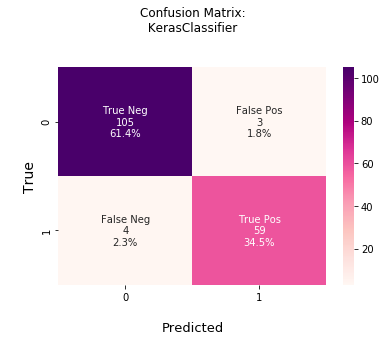

In [22]:
cm =confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
               cm.flatten()]
group_percentages = ['{0:.1%}'.format(value) for value in
                    cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='RdPu')
plt.xlabel('\nPredicted', size=13)
plt.ylabel('\nTrue', size=14)
plt.title("Confusion Matrix:\n KerasClassifier \n\n")
plt.show()

# User Interface

### Use Interactive widget

In [23]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display


In [24]:
x_new = []
radius_mean= widgets.BoundedFloatText(min = 2, max = 40, value = 16.65, step = 0.1, description = "Radius Mean")
texture_mean=widgets.BoundedFloatText(min = 7, max = 50, value = 21.38, step = 0.1, description = "Texture Mean")
perimeter_mean=widgets.BoundedFloatText(min = 30, max = 300, value = 110, step = 0.1, description = "Perimeter Mean")
area_mean=widgets.BoundedFloatText(min = 120, max = 5000, value = 904.6, step = 0.1, description = "Area Mean")
smoothness_mean=widgets.BoundedFloatText(min = 0.01, max = 0.5, value = 0.11, step = 0.01, description = "Smoothness Mean")
compactness_mean=widgets.BoundedFloatText(min = 0.01, max = 1.5, value = 0.15, step = 0.01, description = "Compactness Mean")
concavity_mean=widgets.BoundedFloatText(min = 0, max = 2, value = 0.15, step = 0.01, description = "Concavity Mean")
concave_points_mean=widgets.BoundedFloatText(min = 0, max = 0.4, value = 0.09, step = 0.01, description = "Concave Points Mean")
symmetry_mean=widgets.BoundedFloatText(min = 0.1, max = 0.8, value = 0.2, step = 0.01, description = "Symmetry Mean")
fractal_dimension_mean=widgets.BoundedFloatText(min = 0.01, max = 0.3, value = 0.06, step = 0.01, description = "Fractal Dimension Mean")
radius_se=widgets.BoundedFloatText(min = 0.1, max = 10, value = 0.8, step = 0.1, description = "Radius se")
texture_se=widgets.BoundedFloatText(min = 0.2, max = 10, value = 0.9, step = 0.1, description = "Texture se")
perimeter_se=widgets.BoundedFloatText(min = 0.5, max = 30, value = 5.4, step = 0.1, description = "Perimeter se")
area_se=widgets.BoundedFloatText(min = 5, max = 600, value = 102.6, step = 0.1, description = "Area se")
smoothness_se=widgets.BoundedFloatText(min = 0, max = 0.06, value = 0.006, step = 0.001, description = "Smoothness se")
compactness_se=widgets.BoundedFloatText(min = 0, max = 0.3, value = 0.02, step = 0.001, description = "Compactness se")
concavity_se=widgets.BoundedFloatText(min = 0, max = 0.5, value = 0.02, step = 0.1, description = "Concavity se")
concave_points_se=widgets.BoundedFloatText(min = 0, max = 0.2, value = 0.02, step = 0.1, description = "Concave Points se")
symmetry_se=widgets.BoundedFloatText(min = 0, max = 0.2, value = 0.02, step = 0.001, description = "Symmetry se")
fractal_dimension_se=widgets.BoundedFloatText(min = 0, max = 0.2, value = 0.002, step = 0.0001, description = "Fractal Dimension se")
radius_worst=widgets.BoundedFloatText(min = 2, max = 40, value = 26.5, step = 0.1, description = "Radius Worst")
texture_worst=widgets.BoundedFloatText(min = 7, max = 50, value = 31.6, step = 0.1, description = "Texture Worst")
perimeter_worst=widgets.BoundedFloatText(min = 30, max = 300, value = 177, step = 0.1, description = "Perimeter Worst")
area_worst=widgets.BoundedFloatText(min = 120, max = 5000, value = 2215, step = 0.1, description = "Area Worst")
smoothness_worst=widgets.BoundedFloatText(min = 0.01, max = 0.5, value = 0.2, step = 0.01, description = "Smoothness Worst")
compactness_worst=widgets.BoundedFloatText(min = 0.01, max = 1.5, value = 0.4, step = 0.01, description = "Compactness Worst")
concavity_worst=widgets.BoundedFloatText(min = 0, max = 2, value = 0.5, step = 0.01, description = "Concavity Worst")
concave_points_worst=widgets.BoundedFloatText(min = 0, max = 0.4, value = 0.2, step = 0.01, description = "Concave Points Worst")
symmetry_worst=widgets.BoundedFloatText(min = 0.1, max = 0.8, value = 0.4, step = 0.01, description = "Symmetry Worst")
fractal_dimension_worst=widgets.BoundedFloatText(min = 0.01, max = 0.09, value = 6.98, step = 0.01, description = "Fractal Dimension Worst")


input_widget1 = widgets.HBox([radius_mean, texture_mean, perimeter_mean])

input_widget2 = widgets.HBox([area_mean,smoothness_mean,compactness_mean])

input_widget3 = widgets.HBox([concavity_mean, concave_points_mean, symmetry_mean])

input_widget4 = widgets.HBox([fractal_dimension_mean,radius_se,texture_se])

input_widget5 = widgets.HBox([perimeter_se, area_se, smoothness_se])

input_widget6 = widgets.HBox([compactness_se,concavity_se,concave_points_se])

input_widget7 = widgets.HBox([symmetry_se, fractal_dimension_se, radius_worst])

input_widget8 = widgets.HBox([texture_worst,perimeter_worst,area_worst])

input_widget9 = widgets.HBox([smoothness_worst, compactness_worst, concavity_worst])

input_widget10 = widgets.HBox([concave_points_worst,symmetry_worst,fractal_dimension_worst])



display(input_widget1)
display(input_widget2)
display(input_widget3)
display(input_widget4)
display(input_widget5)
display(input_widget6)
display(input_widget7)
display(input_widget8)
display(input_widget9)
display(input_widget10)





##### Output: Run cell below to get prediction

In [25]:

x_new.append([radius_mean.value,texture_mean.value,perimeter_mean.value,area_mean.value,smoothness_mean.value,
              compactness_mean.value,concavity_mean.value,concave_points_mean.value,symmetry_mean.value,
              fractal_dimension_mean.value,radius_se.value,texture_se.value,perimeter_se.value,area_se.value,
              smoothness_se.value,compactness_se.value,concavity_se.value,concave_points_se.value,
              symmetry_se.value,fractal_dimension_se.value,radius_worst.value,texture_worst.value,perimeter_worst.value,
              area_worst.value,smoothness_worst.value,compactness_worst.value,concavity_worst.value,
              concave_points_worst.value,symmetry_worst.value,fractal_dimension_worst.value])


y_predicted = clf.predict(x_new)

print('The Predicted class is', y_predicted)

The Predicted class is [[1]]


# new data suggestions for widget
class 1


x_new = [16.65,21.38,110,904.6,0.1121,0.1457,0.1525,
0.0917,0.1995,0.0633,0.8068,0.9017,5.455,102.6,
0.006048,0.01882,0.02741,0.0113,0.01468,0.002801,
26.46,31.56,177,2215,0.1805,0.3578,0.4695,0.2095,0.3613,0.09564])

class 0



x_new = 9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,0.1815,
0.06905,0.2773,0.9768,1.909,15.7,0.009606,0.01432,0.01985,	0.01421,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.245,0.07773


### Import new data from excel

In [37]:
from pathlib import Path
data_folder = Path(input("Choose File Path")) # enter your folder path
New_data = data_folder / input("Insert New data file: ")# enter the name of the file.csv
f = open(New_data)

Choose File PathC:\Users\Ramatu's PC\Desktop\430pm
Insert New data file: test_data.csv


In [41]:
new_x = pd.read_csv(New_data)

In [48]:
new_x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,13.450,18.30,86.60,555.1,0.10220,0.08165,0.039740,0.027800,0.1638,0.05710,...,15.10,25.94,97.59,699.4,0.1339,0.17510,0.13810,0.07911,0.2678,0.06603
1,15.060,19.83,100.30,705.6,0.10390,0.15530,0.170000,0.088150,0.1855,0.06284,...,18.23,24.23,123.50,1025.0,0.1551,0.42030,0.52030,0.21150,0.2834,0.08234
2,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,0.2095,0.05649,...,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368
3,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,0.06635,...,12.83,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376
4,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,0.06890,...,10.92,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988
5,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,0.1620,0.06582,...,13.06,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756
6,14.420,19.77,94.48,642.5,0.09752,0.11410,0.093880,0.058390,0.1879,0.06390,...,16.33,30.86,109.50,826.4,0.1431,0.30260,0.31940,0.15650,0.2718,0.09353
7,13.610,24.98,88.05,582.7,0.09488,0.08511,0.086250,0.044890,0.1609,0.05871,...,16.99,35.27,108.60,906.5,0.1265,0.19430,0.31690,0.11840,0.2651,0.07397
8,6.981,13.43,43.79,143.5,0.11700,0.07568,0.000000,0.000000,0.1930,0.07818,...,7.93,19.54,50.41,185.2,0.1584,0.12020,0.00000,0.00000,0.2932,0.09382
9,12.180,20.52,77.22,458.7,0.08013,0.04038,0.023830,0.017700,0.1739,0.05677,...,13.34,32.84,84.58,547.8,0.1123,0.08862,0.11450,0.07431,0.2694,0.06878


In [50]:
y_predicted = clf.predict(new_x)
# predicts y from new data

In [52]:
new_x["prediction"] = y_predicted
#adds the predicted value to dataframe

In [53]:
new_x
# Predicted values should correspond to the following:
#B #M #M #B #B #B #M #M #B #B #B


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,prediction
0,13.450,18.30,86.60,555.1,0.10220,0.08165,0.039740,0.027800,0.1638,0.05710,...,25.94,97.59,699.4,0.1339,0.17510,0.13810,0.07911,0.2678,0.06603,0
1,15.060,19.83,100.30,705.6,0.10390,0.15530,0.170000,0.088150,0.1855,0.06284,...,24.23,123.50,1025.0,0.1551,0.42030,0.52030,0.21150,0.2834,0.08234,1
2,20.260,23.03,132.40,1264.0,0.09078,0.13130,0.146500,0.086830,0.2095,0.05649,...,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368,1
3,12.180,17.84,77.79,451.1,0.10450,0.07057,0.024900,0.029410,0.1900,0.06635,...,20.92,82.14,495.2,0.1140,0.09358,0.04980,0.05882,0.2227,0.07376,0
4,9.787,19.94,62.11,294.5,0.10240,0.05301,0.006829,0.007937,0.1350,0.06890,...,26.29,68.81,366.1,0.1316,0.09473,0.02049,0.02381,0.1934,0.08988,0
5,11.600,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,0.1620,0.06582,...,17.16,82.96,512.5,0.1431,0.18510,0.19220,0.08449,0.2772,0.08756,0
6,14.420,19.77,94.48,642.5,0.09752,0.11410,0.093880,0.058390,0.1879,0.06390,...,30.86,109.50,826.4,0.1431,0.30260,0.31940,0.15650,0.2718,0.09353,1
7,13.610,24.98,88.05,582.7,0.09488,0.08511,0.086250,0.044890,0.1609,0.05871,...,35.27,108.60,906.5,0.1265,0.19430,0.31690,0.11840,0.2651,0.07397,1
8,6.981,13.43,43.79,143.5,0.11700,0.07568,0.000000,0.000000,0.1930,0.07818,...,19.54,50.41,185.2,0.1584,0.12020,0.00000,0.00000,0.2932,0.09382,0
9,12.180,20.52,77.22,458.7,0.08013,0.04038,0.023830,0.017700,0.1739,0.05677,...,32.84,84.58,547.8,0.1123,0.08862,0.11450,0.07431,0.2694,0.06878,0


In [64]:
#Export the new file - with prediction column included
export_file = new_x.to_csv(data_folder/ "Result.csv", index = None, header=True)

# Plot History

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


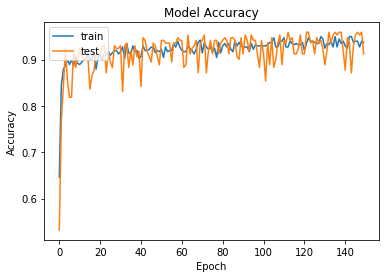

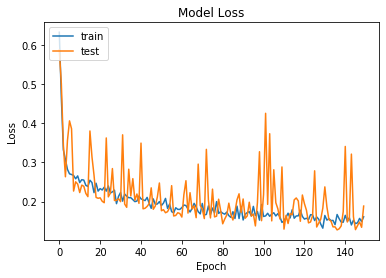

In [65]:
# Fit the model using best parameters
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history[ 'accuracy' ])
plt.plot(history.history[ 'val_accuracy'])
plt.title( 'Model Accuracy' )
plt.ylabel( 'Accuracy' )
plt.xlabel( 'Epoch' )

plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()
# summarize history for loss
plt.plot(history.history[ 'loss' ])
plt.plot(history.history[ 'val_loss' ])
plt.title( 'Model Loss' )
plt.ylabel( 'Loss' )
plt.xlabel( 'Epoch' )
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()